<center> <h2> DS 3000 - Spring 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> House Price Prediction</h3> </center>
<center><h4>Stella Ikpatt, Xuyang Li, Martina Radoslavov, Julia Schneider Valois Pires</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In this section, orient your readers to your project. You've already written some of these in previous deliverables. Based on your final analysis, revise your problem statement and write a concise introduction section. This section should touch upon the following points, but should be written in full paragraphs. Your writing should incorporate all of these points (and more if you like) in a coherent way. Remember that you are trying to convince your readers that this is an important problem to tackle. 

Problem Statement
* Describe the problem you would like to tackle. 
* What is the topic of your project? 
* What do you want to learn about it?

Significance of the Problem
* Why is it important to tackle this problem in your project?
* In what ways could the insights from this project be useful?
* Has there been previous work on your topic? Do some research into your topic. Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

Questions/Hypothesis
* End this section with a list of questions and hypotheses
* You should tie these questions/hypotheses to the problem statement and its significance
    * e.g. Given the aforementioned problem and its importance, we set out to tackle the following questions:
    
**Requirement:**
* You should have at least one question tapping into the comparison of various machine learning algorithms in predicting your target variable from your features variables.
* You should have at least one hypothesis regarding the relationship between two variables.

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a separate script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset and variables. What do variables represent?


### 2.2. Variables
* For your hypotheses, what are your IVs and DVs?
* For your predictive models, what are your features and target variables?


### 2.3. Data Analysis
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables?
* Describe whether this is a supervised or unsupervised learning problem. Also identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? Why?

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to extract your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


In [2]:
#requiring libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#Explore all featuers we have for testing, we know that the extra column in training set is the price
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We could see from the above output all the features we have. There are several steps for cleaning the dataset and prepare them for analysis. The first thing is to deal with null values. Missing data might lead to reduction of sample size, or it could be hiding a bias.

In [7]:
#count missing data
number_missing = train.isnull().sum().sort_values(ascending=False)
percent_missing = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
null_summary = pd.concat([number_missing, percent_missing], axis=1, keys=['Number', 'Percent'])
null_summary = null_summary[null_summary['Number'] != 0]
null_summary

,Number,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We can see from the above output that there are 19 features where some rows is missing the feature. No null value was presented in other features.

Seeing the percent column, which gives us how many percent of rows in the training dataset is missing that value, we could see that for features such as PoolQC or MiscFeature, there are more than 95% houses missing these features. If we choose to drop rows missing these data, we will be dropping a lot of rows and have minimal data left to deal with. Therefore, we will be dropping the features (columns) which are missing in more than 15% of the rows to ensure that we still have a large enough dataset.

We could observe that the 5 features related to Garage have the same number of rows missing them. Recall that there is a 'GarageCars' feature in the dataset; these features are describing different aspects of the garage, therefore we could only keep the one that is not missed by too many rows. The same philosophy applies to features related to Bsmy and MasVnr.

We could notice that there is only 1 row missing Electrical, therefore we could just drop that row.

We will also drop the id column, since the enumerated id is not going to influence the price of the house.

In [8]:
train = train.drop((null_summary[null_summary['Number'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train = train.drop('Id',1)
train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [9]:
#confirm that there is no null values left
train.isnull().sum().max()

0

In [10]:
#remaining features
train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

We are done dealing with null data. Next we need to deal with non-numerical features. We will first see what categories are there, and then convert them into discrete numerical values

In [11]:
#find all columns that are not numeric
non_numeric_cols = train.select_dtypes(exclude=['number'])
non_numeric_cols.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
#find number of unique values in each column
non_numeric_cols.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [13]:
#transforming the dataframe
columns = list(non_numeric_cols)
columns
for i in columns:
    unique_values = non_numeric_cols[i].unique()
    convert_dict = {unique_values[j] : j for j in range(0, len(unique_values))}
    train[i] = train[i].apply(lambda x: convert_dict[x])
train.head(50)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,8450,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,9600,0,0,0,0,1,0,1,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,11250,0,1,0,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,9550,0,1,0,0,2,0,2,...,272,0,0,0,0,2,2006,0,1,140000
4,60,0,14260,0,1,0,0,1,0,3,...,0,0,0,0,0,12,2008,0,0,250000
5,50,0,14115,0,1,0,0,0,0,4,...,0,320,0,0,700,10,2009,0,0,143000
6,20,0,10084,0,0,0,0,0,0,5,...,0,0,0,0,0,8,2007,0,0,307000
7,60,0,10382,0,1,0,0,2,0,6,...,228,0,0,0,350,11,2009,0,0,200000
8,50,1,6120,0,0,0,0,0,0,7,...,205,0,0,0,0,4,2008,0,1,129900
9,190,0,7420,0,0,0,0,2,0,8,...,0,0,0,0,0,1,2008,0,0,118000


### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and link those in Jupyter Notebook)


We will first examine 

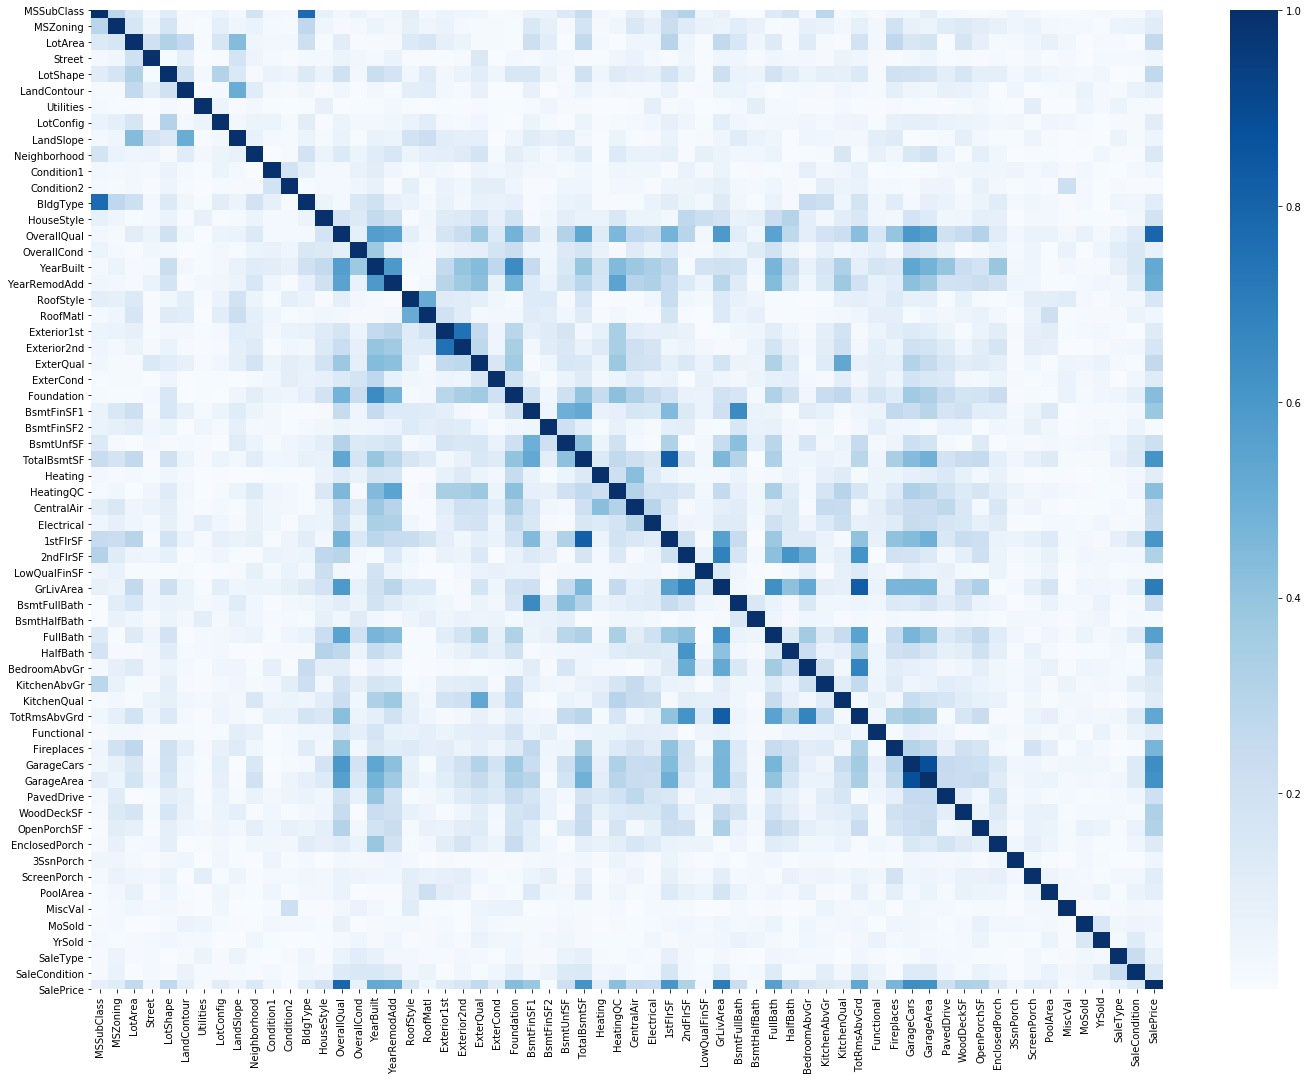

In [29]:
cor_matrix = train.corr().abs()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(cor_matrix, cmap="Blues")

From the above heatmap, we could see that there are extremely bright (with high cor coefficient) blocks, such as Garage Cars and Garage Area.
We are most interested in features with some correlation with the price of the house. From the heat map we could observe tgat some features have close to none correlation with the price. These are
Utilities, Condition2, RoofMatl, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, MiscVal, MoSoldPoolArea, 3SsnPornch, YrSold

High corr with price: OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1lrSF, GrLiveArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF

We will zoom into these features

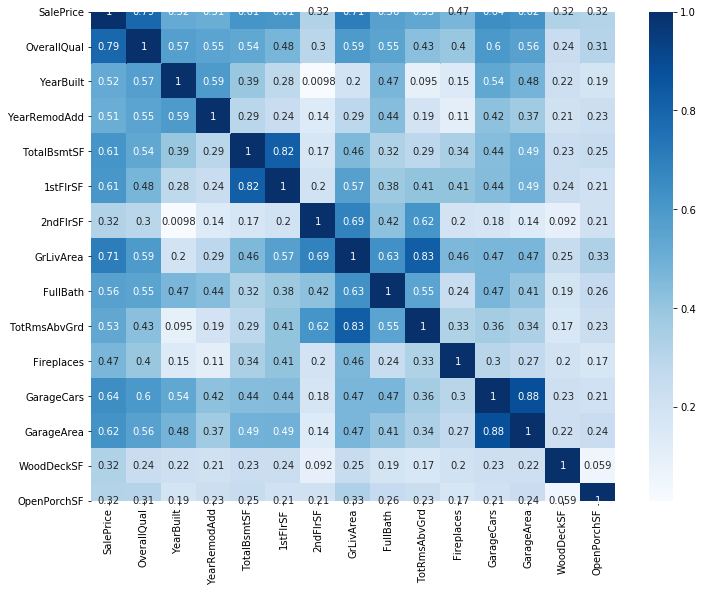

In [41]:
high_corr = train[['SalePrice','OverallQual', 'YearBuilt',
                    'YearRemodAdd','TotalBsmtSF', '1stFlrSF',
                    '2ndFlrSF', 'GrLivArea','FullBath',
                    'TotRmsAbvGrd','Fireplaces', 'GarageCars',
                    'GarageArea','WoodDeckSF','OpenPorchSF']]
cor_matrix = high_corr.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor_matrix, cmap="Blues", annot=True, square=True)

Need to fix graph.
Notice some features are correlated to each other. Observe correlation

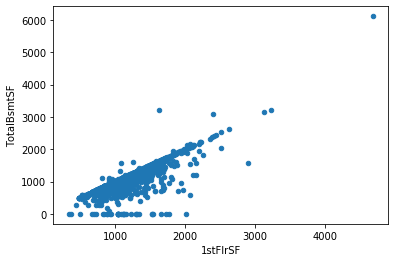

In [48]:
TotaleBsmySF_1stFlrSF = train[['1stFlrSF', 'TotalBsmtSF']]
TotaleBsmySF_1stFlrSF.plot.scatter(x='1stFlrSF', y='TotalBsmtSF')

There is a clear positive correlation, with few outliers. Considering both these features might be redundant.
Now examine some features correlated to the price, say GrLivArea (as we expected).

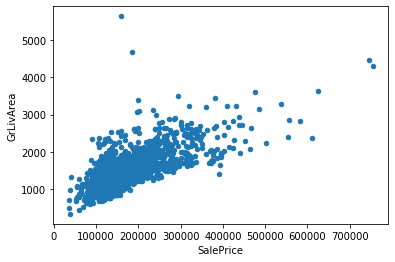

In [51]:
grLivArea_price = train[['SalePrice', 'GrLivArea']]
grLivArea_price.plot.scatter(x='SalePrice', y='GrLivArea')

There is clearly a positive correlation. However, we can see there are two interesting outliers, where the area are the two largest ones but price is very low. This could be caused by the fact that they are too large. We should drop these outliars. To do that we would locate them and drop them.

### 3.3. Model Construction
* If you proposed hypotheses, conduct your hypothesis tests
* For your machine learning question(s), split data into training, validation, and testing sets (or use cross-validation)
* Apply machine learning algorithms (apply at least three algorithms)
* Train your algorithms

### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your validation set
* Interpret your results from multiple models (and hypothesis tests, if any)

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

### 3.6. Model Testing
* Test your tuned algorithms using your testing set

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Intepret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
* If you tested hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work 
    *(e.g., get more data, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. 